In [6]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [10]:
Tweet = pd.read_csv('Tweets.csv')

In [17]:
Tweet = Tweet[Tweet['airline']=='United']

In [18]:
Tweet

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
504,570307876897628160,positive,1.0000,NaN,NaN,United,rdowning76,0,@united thanks,2015-02-24 11:42:48 -0800,usa,NaN
505,570307847281614848,positive,1.0000,NaN,NaN,United,CoreyAStewart,0,@united Thanks for taking care of that MR!! Ha...,2015-02-24 11:42:41 -0800,"Richmond, VA",Eastern Time (US & Canada)
506,570307109704900608,negative,1.0000,Cancelled Flight,0.7030,United,CoralReefer420,0,@united still no refund or word via DM. Please...,2015-02-24 11:39:45 -0800,"Bay Area, California",Alaska
507,570307026263384064,negative,1.0000,Late Flight,1.0000,United,lsalazarll,0,@united Delayed due to lack of crew and now de...,2015-02-24 11:39:25 -0800,NaN,Mountain Time (US & Canada)
508,570306733010264064,positive,0.3441,NaN,0.0000,United,rombaa,0,@united thanks -- we filled it out. How's our ...,2015-02-24 11:38:15 -0800,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4321,567614049425555457,negative,1.0000,Customer Service Issue,0.3545,United,JustOGG,0,"@united, link to current status of flights/air...",2015-02-17 01:18:29 -0800,Tweets = My Opinion,Eastern Time (US & Canada)
4322,567595670463205376,negative,1.0000,Late Flight,1.0000,United,CRomerDome,0,@united I like delays less than you because I'...,2015-02-17 00:05:27 -0800,"Portland, OR",Pacific Time (US & Canada)
4323,567594579310825473,negative,1.0000,Bad Flight,0.6707,United,brenduch,0,@united and don't hope for me having a nicer f...,2015-02-17 00:01:07 -0800,NaN,Buenos Aires
4324,567592368451248130,negative,1.0000,Late Flight,1.0000,United,brenduch,0,@united the we got into the gate at IAH on tim...,2015-02-16 23:52:20 -0800,NaN,Buenos Aires


In [19]:
(len(Tweet)-Tweet.count())/len(Tweet)

tweet_id                        0.000000
airline_sentiment               0.000000
airline_sentiment_confidence    0.000000
negativereason                  0.311094
negativereason_confidence       0.215071
airline                         0.000000
name                            0.000000
retweet_count                   0.000000
text                            0.000000
tweet_created                   0.000000
tweet_location                  0.311094
user_timezone                   0.338828
dtype: float64

Text(0.5, 1.0, 'Count of Moods')

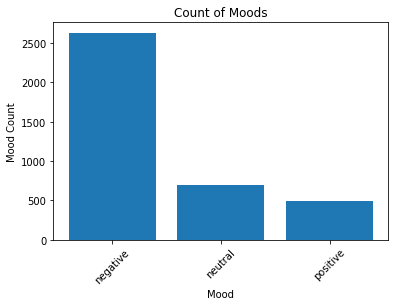

In [21]:
Mood_count=Tweet['airline_sentiment'].value_counts()
Index = [1,2,3]
plt.bar(Index,Mood_count)
plt.xticks(Index,['negative','neutral','positive'],rotation=45)
plt.ylabel('Mood Count')
plt.xlabel('Mood')
plt.title('Count of Moods')

In [22]:
NR_Count=dict(Tweet['negativereason'].value_counts(sort=False))

In [23]:
def NR_Count(Airline):
    if Airline=='All':
        df=Tweet
    else:
        df=Tweet[Tweet['airline']==Airline]
    count=dict(df['negativereason'].value_counts())
    Unique_reason=list(Tweet['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pandas.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

In [24]:
def plot_reason(Airline):
    df=NR_Count(Airline)
    count=df['count']
    Index = range(1,(len(df)+1))
    plt.bar(Index,count)
    plt.xticks(Index,df['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)

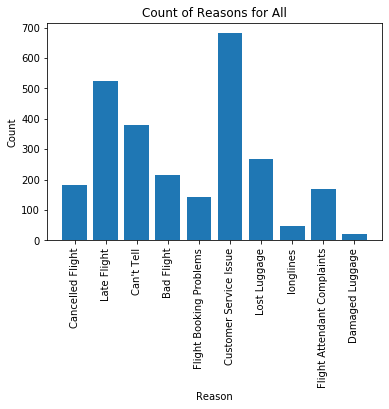

In [26]:
plot_reason('All')

In [28]:
from wordcloud import WordCloud,STOPWORDS

In [29]:
df=Tweet[Tweet['airline_sentiment']=='negative']
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [30]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

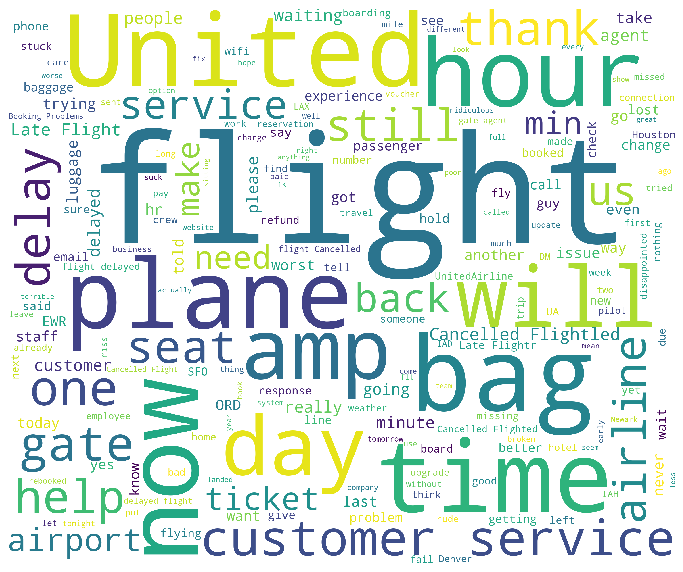

In [34]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [53]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rumaisarachman/nltk_data...
[nltk_data] Error downloading 'stopwords' from
[nltk_data]     <https://raw.githubusercontent.com/nltk/nltk_data/gh-
[nltk_data]     pages/packages/corpora/stopwords.zip>:   <urlopen
[nltk_data]     error [SSL: CERTIFICATE_VERIFY_FAILED] certificate
[nltk_data]     verify failed: unable to get local issuer certificate
[nltk_data]     (_ssl.c:1056)>


In [35]:
def tweet_to_words(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

In [36]:
def clean_tweet_length(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words)) 

In [64]:
Tweet['sentiment']=Tweet['airline_sentiment'].apply(lambda x: -1 if x=='negative' else 1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
Tweet['clean_tweet']=Tweet['text'].apply(lambda x: tweet_to_words(x))
Tweet['Tweet_length']=Tweet['text'].apply(lambda x: clean_tweet_length(x))
train,test = train_test_split(Tweet,test_size=0.2,random_state=42)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [55]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rumaisarachman/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [66]:
train_clean_tweet=[]
for tweet in train['clean_tweet']:
    train_clean_tweet.append(tweet)
test_clean_tweet=[]
for tweet in test['clean_tweet']:
    test_clean_tweet.append(tweet)

In [67]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_tweet)
test_features=v.transform(test_clean_tweet)

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [69]:
Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    GaussianNB()]

In [70]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['sentiment'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['sentiment'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))    

Accuracy of LogisticRegressionis 0.6601307189542484
Accuracy of KNeighborsClassifieris 0.4823529411764706


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVCis 0.6601307189542484
Accuracy of DecisionTreeClassifieris 0.6745098039215687
Accuracy of RandomForestClassifieris 0.7450980392156863
Accuracy of AdaBoostClassifieris 0.7294117647058823
Accuracy of GaussianNBis 0.673202614379085


Text(0.5, 1.0, 'Accuracies of Models')

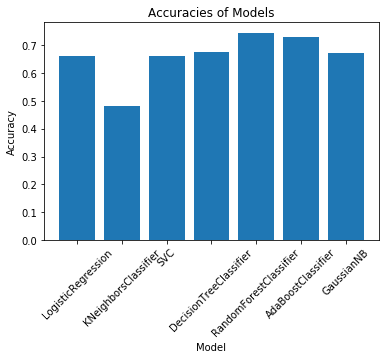

In [71]:
Index = [1,2,3,4,5,6,7]
plt.bar(Index,Accuracy)
plt.xticks(Index, Model,rotation=45)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')